# The problem

Cogo Labs contacts consumers via email with promotional offers. While consumers have opted in to receiving email offers, some tend to ignore them. Because email providers like Gmail and Yahoo! use email open rates as an input to their spam detection filters, when Cogo Labs contacts unresponsive customers (those unlikely to open the emails) it faces the potential cost of having its future messages classified as spam. Therefore, it is crucial to learn which customers are unlikely to open emails and avoid contacting them in the first place. 

# The data
Cogo Labs has provided us with a real-world dataset containing the browsing behavior and email open-rates of approximately 300,000 consumers. The dataset contains the following columns: 

1. user_id: a unique user id 
2. p_open: fraction of times user opened an email 
3. browser1-3: Chrome, Firefox, and Safari (1 if the user was seen using that browser, zero otherwise) 
4. device_type1-4: Android, iDevice, other mobile, and desktop (1 if the user was seen using that device, zero otherwise) 
5. activity_observations: how many times the user has been seen online 
6. activity_days: on how many days has the user been seen online 
7. activity_recency: how many days since the last time we saw the user online 
8. activity_locations: at how many unique locations have we seen the user 
9. activity_ids: on many unique computers (inlc. phones, tablets) have we seen the user 
10. state, age, gender: obvious meaning



## Preparation

Let's start by loading some useful libraries that we've seen before. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi']= 75  # set the resolution of displayed figures
mpl.rc("savefig", dpi=150) # set the resolution of saved figures
plt.style.use('seaborn')

## Load the dataset
Our first task is to load the dataset, which can be downloaded from the course page.  You may have to change the path below, additionally, if you are running these notebooks from your Google Drive, you have to first mount your drive and paste the authorization code here.


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/MLBA/cogo-all.tsv', delimiter='\t')

df.head()

,state,user_id,browser1,browser2,browser3,device_type1,device_type2,device_type3,device_type4,activity_observations,activity_days,activity_recency,activity_locations,activity_ids,age,gender,p_open
0,AK,1087,0,0,1,0,0,0,1,74,15,100,2,3,20,M,0.000000
1,AK,1656,0,1,0,0,1,1,1,39,22,36,4,7,26,F,0.018100
2,AK,2071,0,1,0,0,0,0,1,9,8,27,3,2,28,M,0.035912
3,AK,2228,0,1,0,0,0,0,1,14,11,68,2,2,19,M,0.000000
4,AK,2500,0,0,0,0,1,1,0,2,2,100,1,1,21,F,0.000000


In [ ]:
df.describe()

,user_id,browser1,browser2,browser3,device_type1,device_type2,device_type3,device_type4,activity_observations,activity_days,activity_recency,activity_locations,activity_ids,age,p_open
count,288298.000000,288298.000000,288298.000000,288298.000000,288298.000000,288298.000000,288298.000000,288298.000000,288298.000000,288298.000000,288298.000000,288298.000000,288298.000000,288298.000000,288298.000000
mean,205960.780949,0.129817,0.471738,0.049615,0.217227,0.427419,0.592828,0.719225,58.182610,15.285850,89.228968,1.925580,3.430502,24.003104,0.077920
std,118905.969072,0.336103,0.499201,0.217149,0.412359,0.494705,0.491308,0.449379,165.644633,18.433887,41.698504,0.918596,6.693408,5.492251,0.169392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,27.000000,1.000000,1.000000,18.000000,0.000000
25%,102965.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,52.000000,1.000000,1.000000,20.000000,0.000000
50%,206030.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,19.000000,8.000000,88.000000,2.000000,2.000000,22.000000,0.008197
75%,308954.750000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,59.000000,20.000000,115.000000,2.000000,3.000000,26.000000,0.058228
max,411929.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35134.000000,162.000000,188.000000,13.000000,481.000000,76.000000,1.000000


## Describing the data
let's start by aswering a couple of warm-up questions about the data. 

###1. What fraction of users use each browser type?
The ``browser1`` column contains a 1 if that user uses browser1, and similarly for browsers 2 and 3. 

Let's start by computing the fraction of users one browser at a time: 

In [ ]:

df.loc[(df['browser1'] == 0) & (df['browser2'] == 0) & (df['browser3'] == 0)]

,state,user_id,browser1,browser2,browser3,device_type1,device_type2,device_type3,device_type4,activity_observations,activity_days,activity_recency,activity_locations,activity_ids,age,gender,p_open
4,AK,2500,0,0,0,0,1,1,0,2,2,100,1,1,21,F,0.000000
8,AK,7350,0,0,0,0,1,1,0,118,11,37,2,3,28,F,0.006849
9,AK,7555,0,0,0,1,0,1,0,5,5,106,1,5,33,M,0.000000
10,AK,7851,0,0,0,0,1,1,1,35,6,134,2,2,30,F,0.004008
13,AK,12390,0,0,0,0,0,0,1,1,1,177,1,1,30,F,0.076364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288286,WY,403311,0,0,0,0,1,1,0,6,4,87,1,2,19,M,0.000000
288287,WY,403440,0,0,0,0,0,0,1,90,24,86,2,2,19,M,0.092593
288289,WY,404933,0,0,0,0,1,1,0,128,12,86,2,2,21,M,0.086957
288291,WY,406273,0,0,0,0,1,1,0,13,8,97,2,2,22,F,0.025463


In [ ]:

df['browser1'].sum()/df['browser1'].shape[0] # .count()

# same as df['browser1'].mean()

0.1298170642876468

Now, use a list of column names to simultaneously compute the mean for all three columns. 


In [ ]:

df1 = df[['browser1', 'browser2', 'browser3']].mean()
df1


browser1    0.129817
browser2    0.471738
browser3    0.049615
dtype: float64

Now, let's create a bar plot to represent this data. Remember to label your axes. 

[Text(0, 0.5, 'Fraction of Users'),
 Text(0.5, 0, 'Browser Type'),
 Text(0.5, 1.0, 'Browser Popularity')]

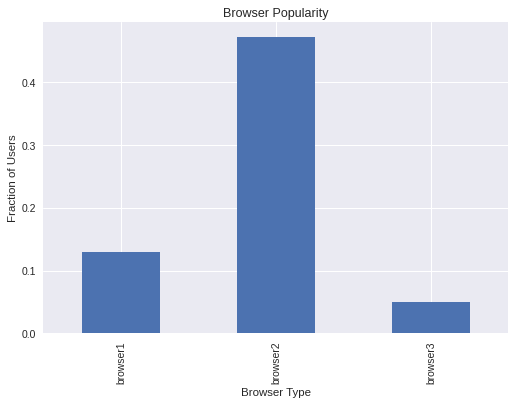

In [ ]:

ax = df1.plot(kind = 'bar')
ax.set(xlabel = "Browser Type", ylabel = "Fraction of Users", title = 'Browser Popularity')

###2. What fraction of users use each device?
Repeat the previous analysis for each of the four device types. 


In [ ]:
# your code here
df2 = df[['device_type1', 'device_type2', 'device_type3', 'device_type4']].mean()


[Text(0, 0.5, 'Fraction of Users'),
 Text(0.5, 0, 'Device Type'),
 Text(0.5, 1.0, 'Device Popularity')]

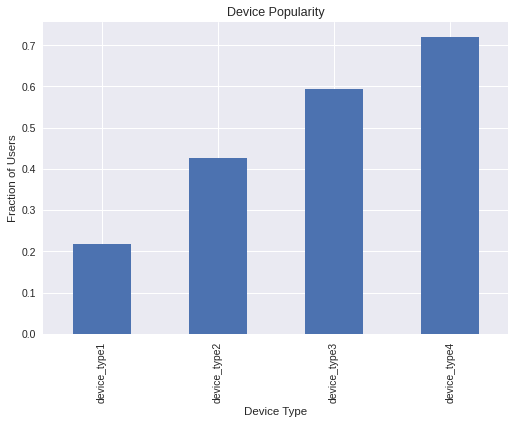

In [ ]:
ax = df2.plot(kind = 'bar')
ax.set(xlabel = "Device Type", ylabel = "Fraction of Users", title = 'Device Popularity')

###3. What fraction of users use more than one browser?
If *which* browser someone uses doesn't tell us much, it is possible that we can get information from their browsing behaviour, including how many different browsers they use. 


Let's first add a new column called ``multihoming`` which is 1 if a user uses multiple browsers and 0 otherwise. 

In [ ]:
df['multihoming'] = df[['browser1', 'browser2', 'browser3']].sum(axis=1)
df

,state,user_id,browser1,browser2,browser3,device_type1,device_type2,device_type3,device_type4,activity_observations,activity_days,activity_recency,activity_locations,activity_ids,age,gender,p_open,multihoming
0,AK,1087,0,0,1,0,0,0,1,74,15,100,2,3,20,M,0.000000,1
1,AK,1656,0,1,0,0,1,1,1,39,22,36,4,7,26,F,0.018100,1
2,AK,2071,0,1,0,0,0,0,1,9,8,27,3,2,28,M,0.035912,1
3,AK,2228,0,1,0,0,0,0,1,14,11,68,2,2,19,M,0.000000,1
4,AK,2500,0,0,0,0,1,1,0,2,2,100,1,1,21,F,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288293,WY,408184,0,1,0,0,1,1,1,11,11,84,1,2,20,M,0.002083,1
288294,WY,408777,0,0,0,0,0,0,1,53,3,30,2,1,30,F,0.337838,0
288295,WY,411525,0,1,0,0,1,1,1,169,49,35,2,3,22,M,0.034409,1
288296,WY,411547,0,1,0,0,0,0,1,22,7,108,3,3,37,M,0.008000,1


Now we can summarise as usual. 

In [ ]:
df['multihoming'] = df[['browser1', 'browser2', 'browser3']].sum(axis=1) > 1
df['multihoming'].mean()

0.07326100077003656

###4. What is the distribution of open-rates?
We already saw that the ``describe`` function can give us much of this information. 
Let's plot a histogram of ``p_open``, using the ``cumulative`` and ``bins`` argument to achieve the desired output.  

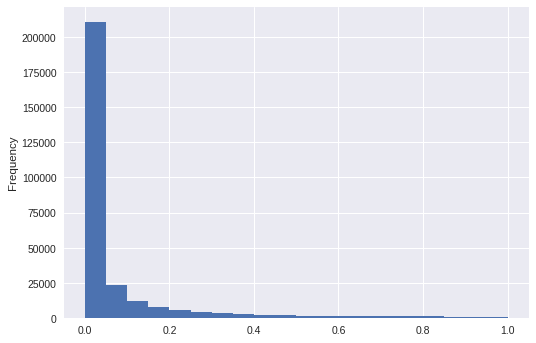

In [ ]:
# historgram of p_open
# cumulative and bins arguments



###5. What is the email open rate by browser?
Let's visualize this with a box plot. Our browser data is currently spread across three columns, so we use the ``melt`` function to unpivot it from a wide to a long format.

 Make sure you understand this code block by running it on the first 10 rows of ``df`` and inspecting the output. 

In [ ]:
df5 = df.loc[:, ['browser1', 'browser2', 'browser3', 'p_open'] ]

df5_long = pd.melt(df5, id_vars=['p_open'],
        value_vars=['browser1', 'browser2', 'browser3'], 
        var_name = 'browser',
        value_name='using-browser' )